In [31]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Dimension reduction and clustering libraries
import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('features_3_sec.csv')

X = df.copy()               # Data
y = X.pop('label')          # Target

# Drop categorical feature (filename)
X.drop(X.select_dtypes('object').columns[0],inplace = True, axis = 1)

# Label encoding for target
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

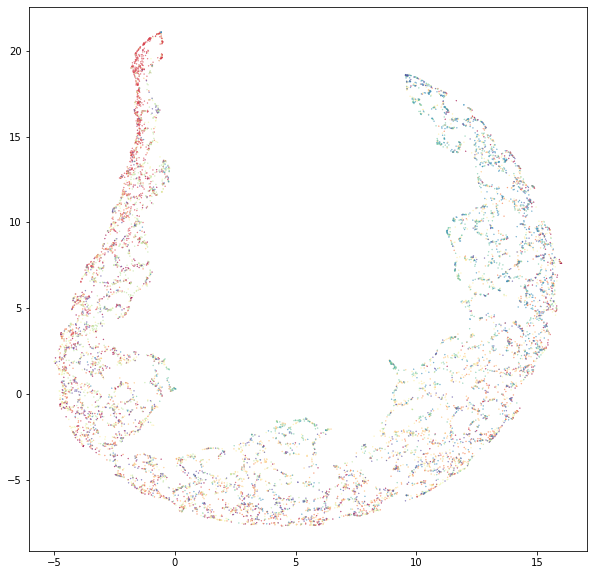

In [33]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(X)
plt.figure(figsize = (10,10))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=y_encoded, s=0.1, cmap='Spectral')

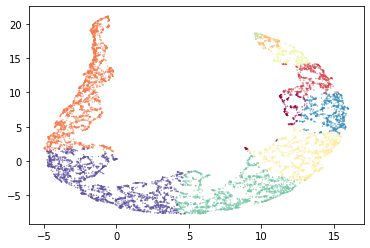

In [34]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(X)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

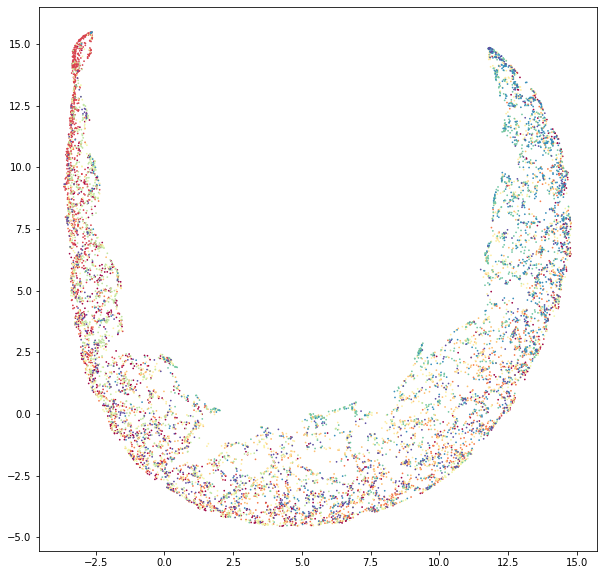

In [38]:
clusterable_embedding = umap.UMAP(
    n_neighbors=100,
    min_dist=0.1,
    n_components=2,
    random_state=42,
).fit_transform(X)

plt.figure(figsize = (10,10))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c=y_encoded, s=0.5, cmap='Spectral')